<a href="https://colab.research.google.com/github/ParzivalWins/Alexa2/blob/master/Powder_LA_Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd # Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python
import json # JSON encoder and decoder for Python
import requests # Library for sending HTTP requests

In [0]:
from getpass import getpass # required only for hiding your variables
api_query_uri = getpass('Enter API Query URI here') # get the URI
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Date', 1: 'Sessions', 2: 'Users'}) # giving the columns some proper titles
df['Sessions'] = df['Sessions'].astype(int) # formatting sessions as ints
df['Users'] = df['Users'].astype(int) # formatting users as ints
df['Date'] = pd.to_datetime(df['Date'])
df.head() # printing the first five rows

Enter API Query URI here··········


,Date,Sessions,Users
0,2019-12-03,5,5
1,2019-12-04,13,13
2,2019-12-05,7,7
3,2019-12-06,6,6
4,2019-12-07,9,10


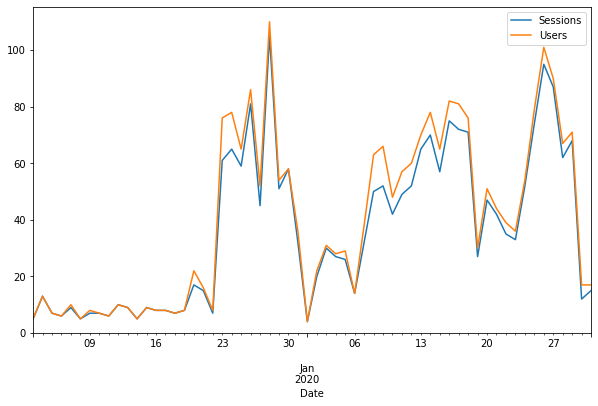

In [0]:
df.plot.line(x='Date', y=['Sessions', 'Users'], ylim=[0,None], figsize=[10, 6])

In [0]:
api_query_uri = getpass('Enter API Query URI here') # get the URI
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Age', 1: 'Gender', 2: 'Sessions'}) # giving the columns some proper titles
df['Sessions'] = df['Sessions'].astype(int) # formatting sessions as ints
df.head()

Enter API Query URI here··········


,Age,Gender,Sessions
0,20191203,5,5
1,20191204,13,13
2,20191205,7,7
3,20191206,6,6
4,20191207,9,10


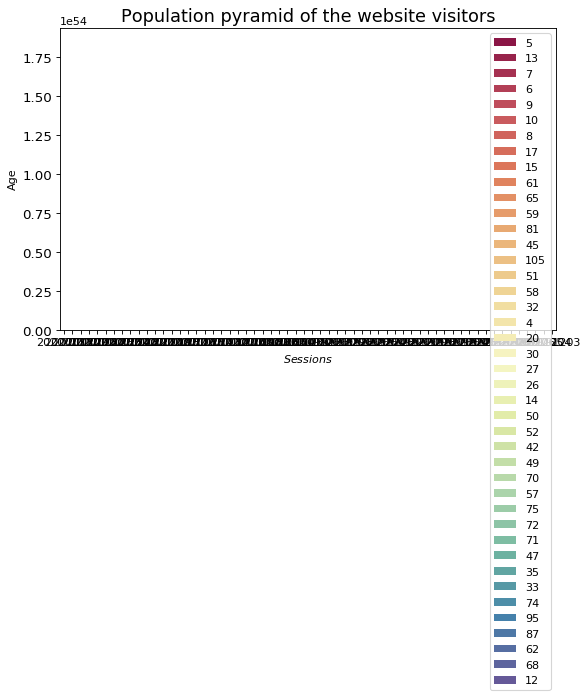

In [0]:
import matplotlib.pyplot as plt # Matplotlib is a popular library for drawing plots in Python
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
# Making copy of the dataframe and modifying session values to be negative for females (see chart below to see why)
df['Sessions'] = df.apply(lambda row: row['Sessions'] * -1 if row['Gender'] == 'female' else row['Sessions'], axis=1)
# Draw Plot
plt.figure(figsize=(8,5), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
for c, group in zip(colors, df[group_col].unique()):
  sns.barplot(x='Sessions', y='Age', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)
# Decorations    
plt.xlabel("$Sessions$")
plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Population pyramid of the website visitors", fontsize=16)
plt.legend()
plt.show()

**Installing JOYPY package** Draws "JoyPlots"

In [0]:
!pip install joypy # install joypy
import joypy # JoyPy is a one-function Python package based on matplotlib + pandas with a single purpose: drawing joyplots.

In [0]:
api_query_uri = getpass('Enter API Query URI here') # get the URI
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Hour', 1: 'Age', 2: 'Transactions'}) # giving the columns some proper titles
df['Hour'] = df['Hour'].astype(int) # formatting hours as ints
df['Transactions'] = df['Transactions'].astype(int) # formatting transactions as ints
df.head()

Enter API Query URI here··········


,Hour,Age,Transactions
0,20191203,5,5
1,20191204,13,13
2,20191205,7,7
3,20191206,6,6
4,20191207,9,10


In [0]:
pivot = pd.pivot_table(df, values='Transactions', index=['Hour'],
columns=['Age'])
pivot = pivot.fillna(0)
pivot.head()

Age,10,105,12,13,14,15,17,20,26,27,30,32,33,35,4,42,45,47,49,5,50,51,52,57,58,59,6,61,62,65,68,7,70,71,72,74,75,8,81,87,9,95
Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20191203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20191204,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20191205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20191206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20191207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


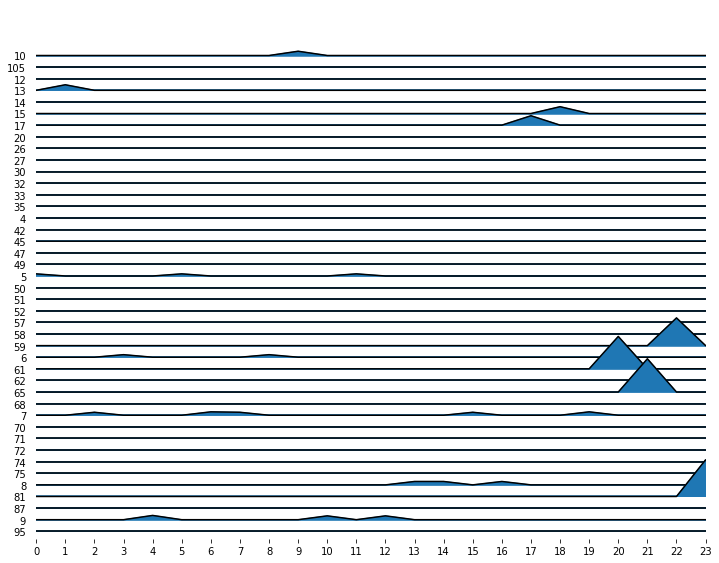

In [0]:
x_range = list(range(24))
fig, axes = joypy.joyplot(pivot, kind="values", x_range=x_range, figsize=(10,8))
axes[-1].set_xticks(x_range);